<a href="https://colab.research.google.com/github/edgeofchaos42/ComplexityExplorer/blob/main/Session_4_Initial_Model_and_Agentize_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Concept** Text fields will give a loose script and the the *talent* will type the the code as they are recording. In post production we can speed this part. If the audio is choppy we could even record the audio seperately. 

### 1- Previous code




In [ ]:
!pip install git+https://github.com/projectmesa/mesa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline 

## Upload the terrain




In [ ]:
#Action 1
with open('SugarSpice.npy', 'rb') as f:
    land = np.load(f)

np.shape(land), np.shape(land[0]) # Action 2

((2, 50, 50), (50, 50))

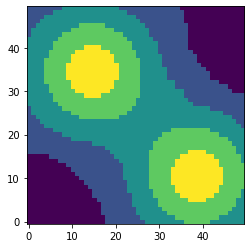

In [ ]:
plt.imshow(land[0], origin="lower") #Action 2, do 0 and then 1

## 1 - agentize the Landscape 

 Welcome to session 4! In this session we are going to create our initial model and we are going to convert the sugar and spice landscape into the agents which will allow our traders can survive and trade.

 Rembmer if you stooped your colab kenerl you will need to reload your landscape and reinstall mesa

   The first thing we want to do for this session is add mesa to our list of imports. (Do this in import cell)

  **ACTION** Do Import

#  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import mesa

%matplotlib inline 


## 2 - agentize the Landscape 

  Second we want to upload our sugar and spice values into an agent. Each resource agent will be a python object. To create these agents we will create the ResourceAgent class and we will inherit the Agent class from mesa so critical functionality like leveraging the step function is already taken care of 

  **ACTION 1** Write class 

  Then we want to intiialize the class. The agent must have the unique-id parameter so mesa can manage all the agents and we will also add a pointer to the model (more on this later). As these attributes are part of mesa we can use Python's super_init function to inherit them. 

  **Action 1a** Show source code for walk from [mesa](https://github.com/projectmesa/mesa) to [agent](https://github.com/projectmesa/mesa/blob/main/mesa/agent.py)
  
  **Action 2** Start init

  As their ID is also their location on the grid since they cannot move we will also add the position attribute
  
  **Action 3** add position

  Next we will add the agent attributes. In this case how much sugar the agent has and how much spice.

  

In [ ]:
class ResourceAgent(mesa.Agent): # Action 1 
    
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model) #Action 2
        self.pos = unique_id #Action 3

## 3 - agentize the Landscape 

*NOTE: Don't make new cells just run the cell and then do the below in the same cell!!!*

  unique_id and model are common for all mesa models so you will see this code again when we build our trader agents. 

  for the resource agents however, we want to pass in their sugar and spice values so we will add the sugar and spice attributes, but numerous different approaches could achieve this outcome.

  **Action 1** Add parameter

If we remember from our upload of the landscape the data structure is a matrix or list of lists with the first list being the sugar value and the second list being the spice values. This will tell us how to take the information from the list and transform it to an agent attribute. As the traders harvest, consume and trade these raw materials we actually need to create five attributes - 

First lets add the current value of the sugar and spice

**Action 2** : add value_sug, value_spice

Second, we need to use this same value to add the max value that resource agent can grow of its respective sugar and spice  resources

**Action 3** add max_sug and max_spice

Third, we need to add the rate at which the value regrows, there are numerous possibilites here. We could make it a parameter so we could run different variations of the model or pass in a distribution so each resource agents has a different regrow rate or whatever else you can imagine. In this case we will stick with 1 as that is what was in *Growing Artifical Societies*

**Action 4** Add regrow

Finally, a Python feature that will help us later is is we `type` our agent to be `resource` and we can also leverage Python private string attribute to make our coding easier as the model gets more complex

**Action 5** Add type and str

In [ ]:
class ResourceAgent(mesa.Agent): # Action 1 
    
    def __init__(self, unique_id, model, sugar, spice): # Action 1
        super().__init__(unique_id, model) #Action 1
        self.pos = unique_id
        self.value_sug = sugar # Action 2
        self.value_spice = spice # Action 2
        self.max_sug = sugar # Action 3
        self.max_spice = spice #Action 3
        self.regrow = 1 # Action 4
        self.type = "resource" #Action 5
        
    def __str__(self): #Action 5
        return "Resource" #Action 5. 

## 4 create the model

Now that we have created the initial resource agent class and laoded the the npy file of our landscape. We need to conect this class into the intiailization of a mesa model. 

To do this we will create another class class TraderScape. This class will be the main manager for the entire model. It will initialize all the agents and manage their interactions and their sequence of movements. This type of set up is standard for all mesa models. If you are using .py files these different cells would typically be different .py files.  

**Action 1**: Initial Traderscape

To initialize our model we will have two parameters, self per python convention and landscape to pass in the numpy file. We will also add three attributes, the width which will be 50 per the npy file, the height, again it will be size 50 and finally the grid on which the location of the agent will be placed. To follow the principle of least surprise mesa models list width (or x axis) and then y (or y axis). The model will work if you do it the other way but keeping this convention will make model development easier. As resource agents and trader agents can be at the same location we will use Mesa's multigrid.

**action 1a**: Show source code for Show source code for walk from [mesa](https://github.com/projectmesa/mesa) to [space and multigrid](https://github.com/projectmesa/mesa/blob/main/mesa/space.py)

**Action 2** add width, height and multigrid

Now we want to create some code to convert the numpy array into the agent attributes, for this will use a for loop in a for loop. To iterate through the x values and then y values. Think of this as building stacks of blocks with x being the location of the stack and y being the height. We then build each stack to 50 before moving to the next stack of blocks. 

**Action 3** add x loop, add y loop

Now that we have the basic structure a resource agent and a mesa model we can initialize an instance of our model. 

**Action 4** Initialize model 



In [ ]:
class TraderScape(mesa.Model): #Action 1

  def __init__(self,land): #Action 1
    
    self.width = 50 #Action 2
    self.height = 50 #Action 2
    self.grid = mesa.space.MultiGrid(self.width, self.height, torus=True)  #New  #Action 2

    #places resources from landscape on grid
    for x in range(50): #action 3
      for y in range(50): #action 3
        sugar = land[0][x][y] 
        spice = land[1][x][y]
        resource =  ResourceAgent((x,y),self,sugar,spice)
        
        self.grid.place_agent(resource, (x,y))

In [ ]:
#Test
TraderScape(land) #Action 4 

## 5 Verify the model


Well it ran without error but what happened. To show part of the model initialization we can add print statements. This will also show the `self.type` atrribute works

**Action 1**: add print resource to model --- then clear output

string function work

**Action 2** add string statement - then clear output


In [ ]:
class TraderScape(mesa.Model): 

  def __init__(self,land): 
    
    self.width = 50 
    self.height = 50 
    self.grid = mesa.space.MultiGrid(self.width, self.height, torus=True)  

    #places resources from landscape on grid
    for x in range(50): 
      for y in range(50): 
        sugar = land[0][x][y] 
        spice = land[1][x][y]
        resource =  ResourceAgent((x,y),self,sugar,spice)
        #print(resource) # #Action 1
        print(resource.value_sug) #Action 2 d
        self.grid.place_agent(resource, (x,y))

In [ ]:
#Test
TraderScape(land) #Notes: Run three time

This concludes session 4 in the next session we will add the trader agents into the model. 